In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
 ("Materias", 'Noticias', 'Curiosidade', 'CoronaVirus')

Text(0.5, 1.0, 'PRINCIPAIS AUTORES E SUA FRENQUECIA POR MÊS.     CATEGORIA: GERAL ANO: 2021')

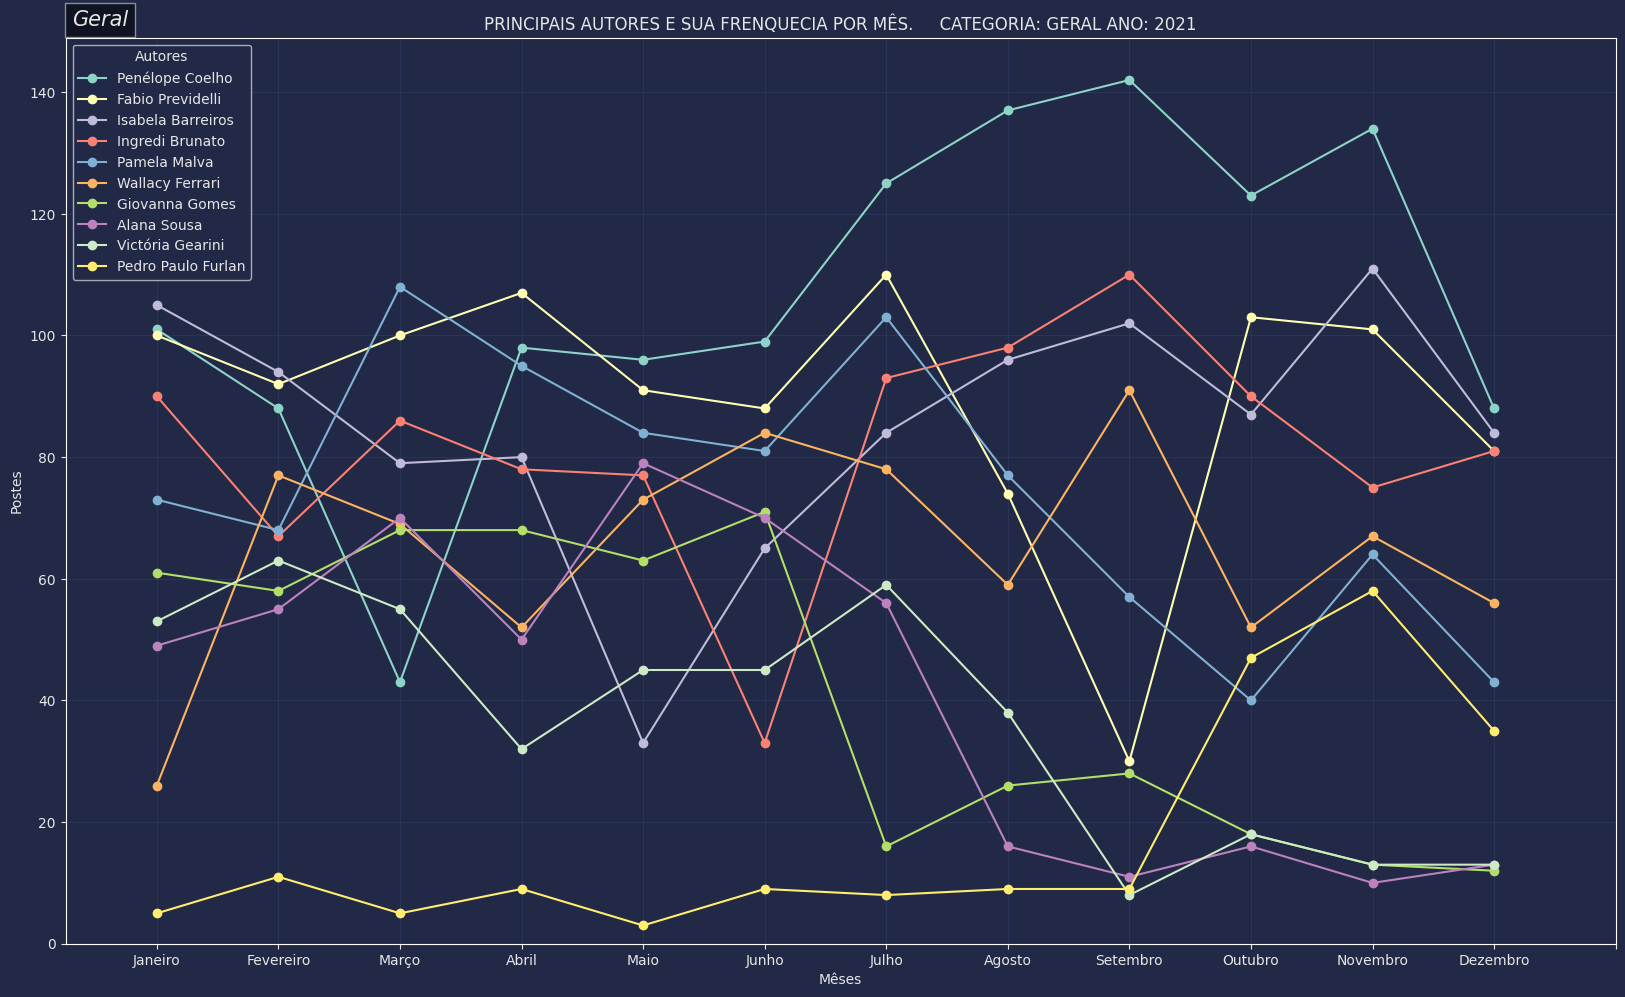

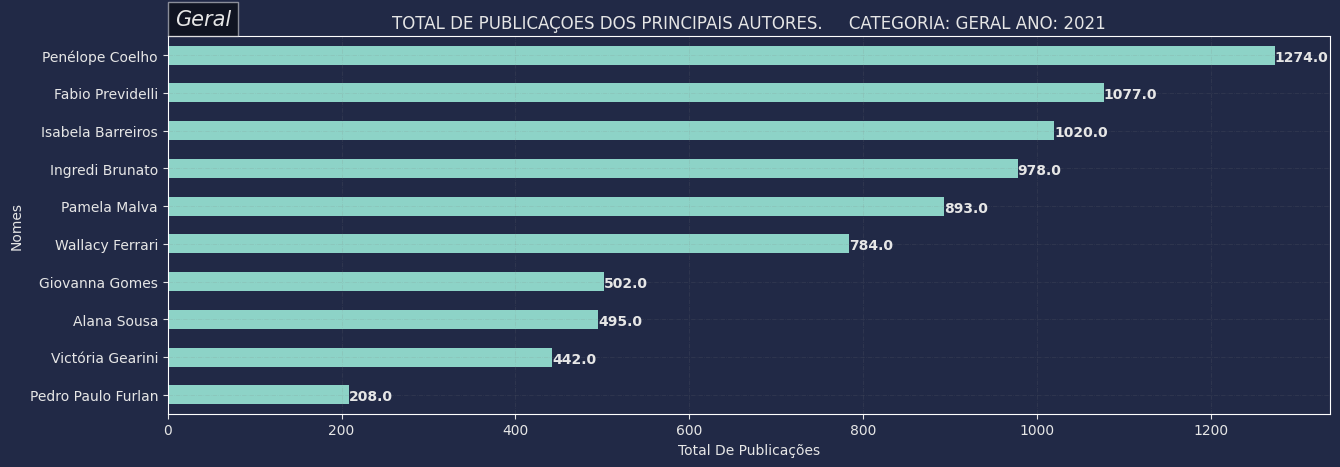

In [ ]:
base = sqlite3.connect("/content/drive/MyDrive/DataBase/AventuraPoste.db")
df = pd.read_sql("SELECT * FROM Poste", base, parse_dates=['Data'], index_col='Data')

Categoria = "Geral"
Ano = 2021

df['year'] = df.index.year
df['month'] = df.index.month
df = df[(df.index.year == Ano)]
df = df[df['Categoria'] == Categoria] if Categoria != 'Geral' else df
df['year'] = df.index.year
df['month'] = df.index.month
df = (df.groupby(['Nome','month']))['Categoria'].count().unstack()
df = df.drop("Redação")
df = df.fillna(0)
df.columns = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

top10 = df.sum(axis=1).sort_values(ascending=False)[:10]


fig, ax = plt.subplots(dpi=100, figsize=(20, 12))
for nome in top10.index:
  df[df.index == nome].iloc[0].plot(marker='o', legend=True, ax=ax)


#####
fig2, ax2 = plt.subplots(dpi=100,figsize=(15, 5))
top10.plot(kind="barh", ax=ax2)
for index, y in enumerate(top10):
  ax2.text(y, index + 0.15 , str(y), fontweight='bold')

ax2.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

ax2.invert_yaxis()
ax2.set_title(f"TOTAL DE PUBLICAÇOES DOS PRINCIPAIS AUTORES.{5*' '}CATEGORIA: {Categoria.upper()} ANO: {Ano}")
ax2.set_xlabel("Total De Publicações")
ax2.set_ylabel("Nomes")
fig2.text(0.130, 0.902, Categoria, style='italic',
        fontsize=15, 
        horizontalalignment='left',
        bbox={'facecolor': 'black', 'alpha': 0.5, 'pad': 5})

#ESTILO
plt.style.use("dark_background")

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
  plt.rcParams[param] = '0.9'  # very light grey

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
  plt.rcParams[param] = '#212946'  # bluish dark grey

ax.grid(color='#2A3459')

fig.text(0.128, 0.89, Categoria, style='italic',
        fontsize=15, 
        horizontalalignment='left',
        bbox={'facecolor': 'black', 'alpha': 0.5, 'pad': 5})
ax.set_xlim([ax.get_xlim()[0] - 0.2, ax.get_xlim()[1] + 0.2])  # to not have the markers cut off
ax.set_ylim(0)
ax.set_xlabel("Mêses")
ax.set_ylabel("Postes")
ax.set_xticks([x for x in range(0, 13)])
ax.set_xticklabels(df.columns)
ax.legend(title='Autores')

ax.set_title(f"PRINCIPAIS AUTORES E SUA FRENQUECIA POR MÊS.{5*' '}CATEGORIA: {Categoria.upper()} ANO: {Ano}")
#ESTILO


In [16]:
base = sqlite3.connect("/content/drive/MyDrive/DataBase/AventuraPoste.db")
df = pd.read_sql("SELECT * FROM Poste", base, parse_dates=['Data'], index_col='Data')

Categoria = "Geral"
Ano = 2021
dicionario_df_categorias = {}


df['year'] = df.index.year
df['month'] = df.index.month
df = df[(df.index.year == Ano)]

for categorias in df['Categoria'].unique():
  
  dicionario_df_categorias[categorias] = df[df['Categoria'] == categorias]
  dicionario_df_categorias[categorias] = (dicionario_df_categorias[categorias].groupby(['Nome','month']))['Categoria'].count().unstack()
  dicionario_df_categorias[categorias].columns = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
  dicionario_df_categorias[categorias] = dicionario_df_categorias[categorias].fillna(0)

multiplicador = 1
for categoria, dfs in dicionario_df_categorias.items():
  
  if categoria == 'Materias':
    multiplicador = 2
  elif categoria == 'Curiosidade':
    multiplicador = 1.5
  
  dicionario_df_categorias[categorias] = dfs * multiplicador

dicionario_df_categorias.values()




dict_values([                                                    Janeiro  ...  Dezembro
Nome                                                         ...          
Adriana Küchler                                         0.0  ...       0.0
Agência Brasil                                          0.0  ...       1.0
Agência Pública - Clarissa Levy e Raphaela Ribeiro      0.0  ...       0.0
Alana Sosa                                              0.0  ...       0.0
Alana Sousa                                            11.0  ...       4.0
...                                                     ...  ...       ...
Wallacy Ferrari/ Atualizado por Fabio Previdelli        1.0  ...       0.0
Wallacy Ferrari/Atualizado por Pamela Malva             0.0  ...       0.0
Willy Delvalle e Joseane Pereira/Atualizado por...      0.0  ...       0.0
Xico Sá                                                 0.0  ...       0.0
Yuri Vasconcelos // Edição 16                           0.0  ...       0.0

[186 rows x